In [1]:
import graphviz
def plot_color(graph):
    color = graphviz.Digraph('color', filename='color.gv')
    indexes = {}
    for k,v in graph.nodes.items():
        name = '{} ({})'.format(k, v['node_attr']['color'][0])
        indexes[k] = name
        color.node(name)
    for edge in graph.edges:
        color.edge(indexes[edge[0]], indexes[edge[1]])
    return color

In [2]:
import easygraph as eg
G1=eg.Graph()
G2=eg.Graph()

Warning raise in module:classes. Please install Pytorch before you use functions related to Hypergraph
 Please install Pytorch before use dataset such as KarateClubDataset、CitationDataset、PPIDataset、LegacyPPIDataset
Warning raise in module:model.Please install Pytorch before you use functions related to Hypergraph
Warning raise in module:nn. Please install Pytorch before you use functions related to Hypergraph


In [3]:
# Assign initial colors
hash_table = {'1':1}
for i in ['a','b','c','d','e','f']:
    G1.add_node(i, node_attr={'color':[hash_table['1']]})
    G2.add_node(i, node_attr={'color':[hash_table['1']]})

In [4]:
bag_of_colors = {hash_table['1']: len(G1.nodes)}

In [5]:
G1.add_edges([('a','b'),('b','c'),('c','d'),('a','d'),('b','d'),('a','f'),('a','e')])
G2.add_edges([('a','b'),('b','c'),('c','d'),('a','d'),('a','c'),('a','f'),('d','e')])

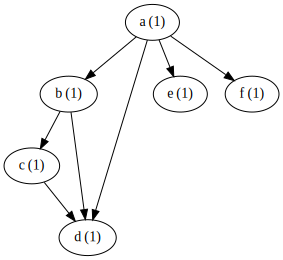

In [6]:
plot_color(G1)

In [15]:
# Aggregate neighboring colors:
# For each node, visit its neighbors and append their color
for k in G1.nodes.keys():
    value = G1.nodes[k]['node_attr']['color'][0]
    #print('node', k, 'color', value)
    for neighbor in G1.neighbors(node=k):
        G1.nodes[neighbor]['node_attr']['color'].append(value)

In [16]:
# Sort aggregated colors, making each combination unique
for k,v in G1.nodes.items():
    first = v['node_attr']['color'][0]
    rest = sorted(v['node_attr']['color'][1:])
    v['node_attr']['color'] = [first] + rest

In [17]:
for k,v in G1.nodes.items():
    print(k,v['node_attr']['color'])

a [2, 3, 3, 5, 5]
b [3, 2, 3, 4]
c [4, 3, 3]
d [3, 2, 3, 4]
e [5, 2]
f [5, 2]


In [18]:
# Hash aggregated colors (update hash table)
for k,v in G1.nodes.items():
    value = ','.join(str(c) for c in v['node_attr']['color'])
    if (value not in hash_table):
        hash_table[value] = len(hash_table)+1
hash_table

{'1': 1,
 '1,1,1,1,1': 2,
 '1,1,1,1': 3,
 '1,1,1': 4,
 '1,1': 5,
 '2,3,3,5,5': 6,
 '3,2,3,4': 7,
 '4,3,3': 8,
 '5,2': 9}

In [19]:
# Update colors in graph
for k,v in G1.nodes.items():
    value = ','.join(str(c) for c in v['node_attr']['color'])
    v['node_attr']['color'] = [hash_table[value]]
    #print(k,v['node_attr']['color'])

In [20]:
# Update embedding vector
for k,v in G1.nodes.items():
    color = v['node_attr']['color'][0]
    if (color not in bag_of_colors):
        bag_of_colors[color] = 1
    else:
        bag_of_colors[color] += 1
bag_of_colors

{1: 6, 2: 1, 3: 2, 4: 1, 5: 2, 6: 1, 7: 2, 8: 1, 9: 2}

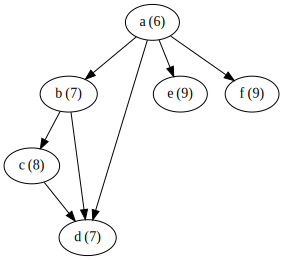

In [21]:
plot_color(G1)

In [14]:
"""# Modify attribute
G1.nodes[1]['node_attr']['color'] +=1
# Each edge
for edge in G1.edges:
    print(edge[0], edge[1])
# Each attribute
for k,v in G1.nodes.items():
    print(k,v['node_attr']['color'])
# Each neighbor
for neighbor in G1.neighbors(node=2):
    print(neighbor)
# Each neighbor for each node
for k in G1.nodes.keys():
    print('node', k)
    for neighbor in G1.neighbors(node=k):
        print(neighbor)"""

"# Modify attribute\nG1.nodes[1]['node_attr']['color'] +=1\n# Each edge\nfor edge in G1.edges:\n    print(edge[0], edge[1])\n# Each attribute\nfor k,v in G1.nodes.items():\n    print(k,v['node_attr']['color'])\n# Each neighbor\nfor neighbor in G1.neighbors(node=2):\n    print(neighbor)\n# Each neighbor for each node\nfor k in G1.nodes.keys():\n    print('node', k)\n    for neighbor in G1.neighbors(node=k):\n        print(neighbor)"